In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Concatenate, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the air quality data
air_quality_data = pd.read_csv(r'C:\Users\tvams\OneDrive\Desktop\Imputation methods\Step-3.csv')

In [3]:
# Perform min-max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(air_quality_data.drop(columns=['Date', 'AQI']))
X_normalized = normalized_data
y = air_quality_data['AQI']

In [4]:
# Reshape data for LSTM/GRU input
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [5]:
# Define LSTM and GRU layers
lstm_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_output = LSTM(50, activation='relu', return_sequences=True)(lstm_input)
gru_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
gru_output = GRU(50, activation='relu', return_sequences=True)(gru_input)
# Concatenate outputs of LSTM and GRU layers
concatenated = Concatenate(axis=1)([lstm_output, gru_output])
# Flatten concatenated output
flattened = Flatten()(concatenated)
# Dense layer for final prediction
output = Dense(1)(flattened)
# Define hybrid model
model = Model(inputs=[lstm_input, gru_input], outputs=output)

In [6]:
import time
start_time = time.time()
# Compile hybrid model
model.compile(optimizer='adam', loss='mse')
end_time = time.time()# Compile hybrid model

compilation_time=end_time-start_time
# Train hybrid model

history = model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test), verbose=1)
print(f"Compilation Time: {compilation_time:.2f} seconds")

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 65635.5391 - val_loss: 62570.1758
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62636.9375 - val_loss: 52768.1562
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51890.3555 - val_loss: 39314.3711
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36480.7383 - val_loss: 27257.4844
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26779.0527 - val_loss: 19144.1504
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19504.1055 - val_loss: 14985.8906
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14924.7363 - val_loss: 13074.9277
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13303.7197 - val_loss: 11915.8984
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12449.8281 - val_loss: 10842.2764
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10827.3623 - val_loss: 9707.0146
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9946.6250 

In [7]:
# Predict using hybrid model
y_pred = model.predict([X_test, X_test])

# Calculate evaluation metrics for hybrid model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Hybrid Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Hybrid Model Evaluation:
MAE: 13.3406
MSE: 343.9450
RMSE: 18.5458
R2 Score: 0.9800


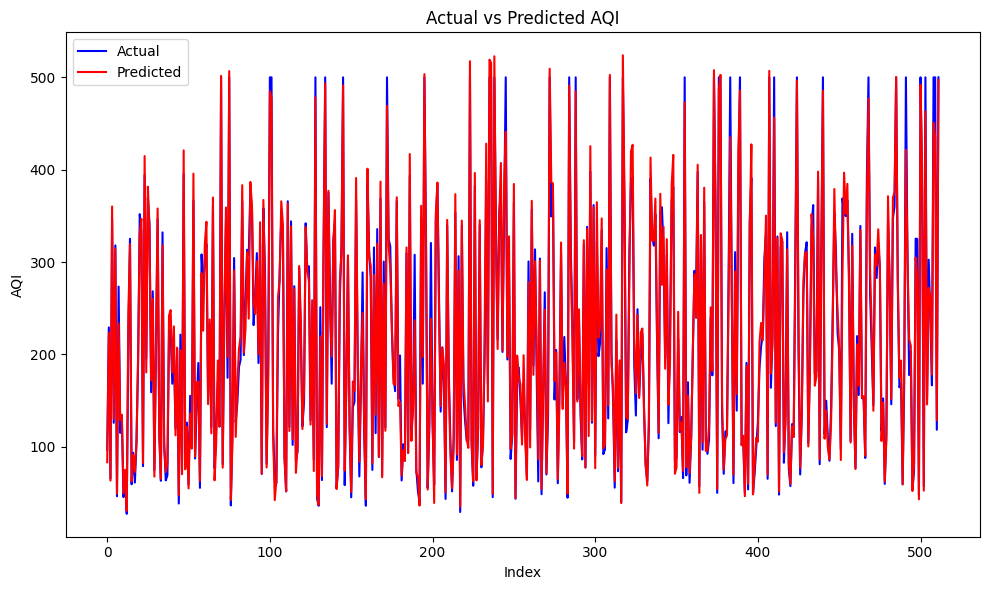

In [8]:
# Plot actual vs predicted AQI values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.tight_layout()

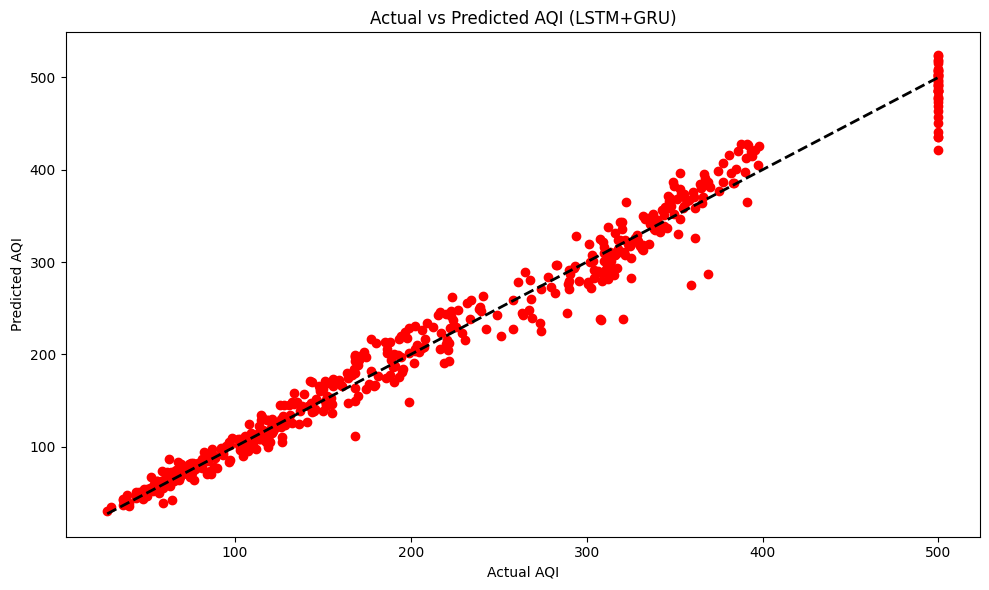

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (LSTM+GRU)')
plt.tight_layout()
plt.show()